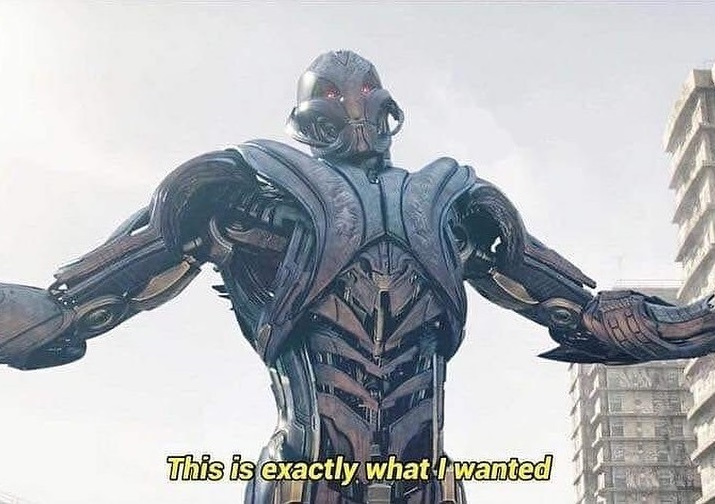

# 🚩 Reviewer's Final Comment:
* Great work. The code is looking amazing.
* You should do some visualization.

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 2: Load the CSV file from Google Drive
import pandas as pd
twitts_train = pd.read_csv('/content/drive/My Drive/twitter_training.csv')
twitts_valid = pd.read_csv('/content/drive/My Drive/twitter_validation.csv')
twitts_train

,tweet_id,tweet_concept,tweet_sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# remove space from column name
twitts_train.columns = twitts_train.columns.str.strip()
twitts_valid.columns = twitts_valid.columns.str.strip()

twitts_train['tweet_sentiment_encoded'] = label_encoder.fit_transform(twitts_train['tweet_sentiment'])
twitts_valid['tweet_sentiment_encoded'] = label_encoder.fit_transform(twitts_valid['tweet_sentiment'])

# Display the DataFrame with the encoded column
print(twitts_train)

       tweet_id tweet_concept tweet_sentiment  \
0          2401   Borderlands        Positive   
1          2401   Borderlands        Positive   
2          2401   Borderlands        Positive   
3          2401   Borderlands        Positive   
4          2401   Borderlands        Positive   
...         ...           ...             ...   
74677      9200        Nvidia        Positive   
74678      9200        Nvidia        Positive   
74679      9200        Nvidia        Positive   
74680      9200        Nvidia        Positive   
74681      9200        Nvidia        Positive   

                                                   tweet  \
0      im getting on borderlands and i will murder yo...   
1      I am coming to the borders and I will kill you...   
2      im getting on borderlands and i will kill you ...   
3      im coming on borderlands and i will murder you...   
4      im getting on borderlands 2 and i will murder ...   
...                                                

In [ ]:
print(twitts_train.columns)

Index(['tweet_id', 'tweet_concept', 'tweet_sentiment', 'tweet',
       'tweet_sentiment_encoded'],
      dtype='object')


Text Preprocessing

In [ ]:
# Lowercases, Punctuation, Numbers and Newline Characters
def clean_text(text):
    """
    Clean and preprocess text data.

    This function performs several cleaning operations on text data:
    - Lowercases the text (Case Folding)
    - Removes punctuation
    - Removes numbers
    - Removes newline characters

    Parameters:
    text (pandas.Series): A pandas Series containing text data.

    Returns:
    pandas.Series: A pandas Series with cleaned text.
    """
    # Lowercasing (Case Folding)
    text = text.str.lower()
    # Removing punctuations, numbers, and newline characters
    text = text.str.replace(r'[^\w\s]', '', regex=True)
    text = text.str.replace("\n", '', regex=True)
    text = text.str.replace('\d', '', regex=True)
    return text

In [ ]:
twitts_train["tweet"] = clean_text(twitts_train["tweet"])
twitts_valid["tweet"] = clean_text(twitts_valid["tweet"])
twitts_train["tweet"]

,tweet
0,im getting on borderlands and i will murder yo...
1,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...
4,im getting on borderlands and i will murder y...
...,...
74677,just realized that the windows partition of my...
74678,just realized that my mac window partition is ...
74679,just realized the windows partition of my mac ...
74680,just realized between the windows partition of...


Remove stopwords

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
# Stopwords
def remove_stopwords(text):
    """
    Remove stopwords from text data.

    This function filters out common stopwords from the text data.
    Stopwords are removed based on the NLTK's English stopwords list.

    Parameters:
    text (pandas.Series): A pandas Series containing text data.

    Returns:
    pandas.Series: A pandas Series with stopwords removed from the text.
    """
    # Removing stopwords
    text = text.apply(lambda x: " ".join(word for word in str(x).split() if word not in stop_words))
    return text
twitts_train["tweet"] = remove_stopwords(twitts_train["tweet"])
twitts_valid["tweet"] = remove_stopwords(twitts_valid["tweet"])
twitts_train["tweet"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,tweet
0,im getting borderlands murder
1,coming borders kill
2,im getting borderlands kill
3,im coming borderlands murder
4,im getting borderlands murder
...,...
74677,realized windows partition mac like years behi...
74678,realized mac window partition years behind nvi...
74679,realized windows partition mac years behind nv...
74680,realized windows partition mac like years behi...


In [ ]:
# 🚩 Reviewer's Comment: You shouldn't do that, this will reduce the sentiment words.

# Rare Words and Frequent Words
def remove_rare_words(df, column_name, n_rare_words=1000):
    """
    Remove rare words from a specified column in a pandas DataFrame.

    This function identifies and removes the least frequently occurring words
    in the text data. It is useful for removing rare words that might not contribute
    significantly to the analysis or modeling.

    Parameters:
    df (pandas.DataFrame): A pandas DataFrame containing the text data.
    column_name (str): The name of the column in the DataFrame to clean.
    n_rare_words (int): The number of least frequent words to remove.

    Returns:
    pandas.DataFrame: A DataFrame with rare words removed from the specified column.
    """
    # Identifying the rare words
    freq = pd.Series(' '.join(df[column_name]).split()).value_counts()
    rare_words = freq[-n_rare_words:]

    # Removing the rare words
    df[column_name] = df[column_name].apply(lambda x: " ".join(word for word in x.split() if word not in rare_words))
    return df
twitts_train = remove_rare_words(twitts_train, 'tweet', 1000)
twitts_train["tweet"]
twitts_valid["tweet"]

,tweet
0,mentioned facebook struggling motivation go ru...
1,bbc news amazon boss jeff bezos rejects claims...
2,microsoft pay word functions poorly samsungus ...
3,csgo matchmaking full closet hacking truly awf...
4,president slapping americans face really commi...
...,...
995,toronto arts culture capital canada wonder wan...
996,actually good move tot bring viewersi one peop...
997,today sucked time drink wine n play borderland...
998,bought fraction microsoft today small wins


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tokenization
from textblob import Word, TextBlob
twitts_train["tweet"].apply(lambda x: TextBlob(x).words)
twitts_valid["tweet"].apply(lambda x: TextBlob(x).words)

,tweet
0,"[mentioned, facebook, struggling, motivation, ..."
1,"[bbc, news, amazon, boss, jeff, bezos, rejects..."
2,"[microsoft, pay, word, functions, poorly, sams..."
3,"[csgo, matchmaking, full, closet, hacking, tru..."
4,"[president, slapping, americans, face, really,..."
...,...
995,"[toronto, arts, culture, capital, canada, wond..."
996,"[actually, good, move, tot, bring, viewersi, o..."
997,"[today, sucked, time, drink, wine, n, play, bo..."
998,"[bought, fraction, microsoft, today, small, wins]"


TF -IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# 🚩 Reviewer's Comment: You shouldn't split the main dataset into train and test, as we seperately give you train and test dataset.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(twitts_train['tweet'],
                                                    twitts_train['tweet_sentiment_encoded'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=twitts_train['tweet_sentiment_encoded'])

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

# Initialize the TF-IDF Vectorizer
tf_idfVectorizer = TfidfVectorizer()

# Transform the training data into TF-IDF features
X_train_tfidf = tf_idfVectorizer.fit_transform(X_train)

# Transform the test data into TF-IDF features (using the same vectorizer)
X_test_tfidf = tf_idfVectorizer.transform(X_test)

# You can now proceed with model training using X_train_tfidf and X_test_tfidf



Shape of X_train:  (59745,)
Shape of X_test:  (14937,)


SVM

In [ ]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Create an SVM model
svm_model = SVC(kernel='linear')  # Linear kernel for text classification

# Train the model
svm_model.fit(X_train_tfidf, y_train)



SVC(kernel='linear')

In [ ]:


# Predict using the reshaped test data
y_pred = svm_model.predict(X_test_tfidf)



In [ ]:

# Print score
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))

0.8237263171989021


Decission Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
# Train the Decision Tree Classifier on the training data
dt_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test_tfidf)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.7749


RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier on the training data
rf_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test_tfidf)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8985


 MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes Classifier
nb_model = MultinomialNB()

# Train the Naive Bayes model on the training data
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = nb_model.predict(X_test_tfidf)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7165


In [ ]:
from sklearn.model_selection import GridSearchCV

Hypermeter Turing

Support Vector Machine (SVM)

In [ ]:

svm_model = SVC()

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],  # Different kernels
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Perform Grid Search
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=2, scoring='accuracy')
svm_grid_search.fit(X_train_tfidf, y_train)

print(f"Best Parameters for SVM: {svm_grid_search.best_params_}")

Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

# Perform Grid Search
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train_tfidf, y_train)

print(f"Best Parameters for Decision Tree: {dt_grid_search.best_params_}")

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


Random Forest

In [ ]:
# Define the model and parameters for tuning
rf_model = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [50, 100],
    'criterion': ['gini'],  # Only gini if entropy is not significantly better
    'max_depth': [None, 10],  # Test only a couple of values
    'min_samples_split': [2]  # Fix at 2 if 5 doesn't improve much
}


# Perform Grid Search
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='accuracy')
rf_grid_search.fit(X_train_tfidf, y_train)

print(f"Best Parameters for Random Forest: {rf_grid_search.best_params_}")

Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


Multinomial Naive Bayes

In [ ]:
# Define the model and parameters for tuning
nb_model = MultinomialNB()
nb_param_grid = {
    'alpha': [0.1, 0.5, 1.0]
}

# Perform Grid Search
nb_grid_search = GridSearchCV(nb_model, nb_param_grid, cv=3, scoring='accuracy')
nb_grid_search.fit(X_train_tfidf, y_train)

print(f"Best Parameters for Multinomial Naive Bayes: {nb_grid_search.best_params_}")

Best Parameters for Multinomial Naive Bayes: {'alpha': 0.1}


Evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Evaluate the best SVM model
#evaluate_model(svm_grid_search.best_estimator_, X_test_tfidf, y_test)

# Evaluate the best Decision Tree model
evaluate_model(dt_grid_search.best_estimator_, X_test_tfidf, y_test)

# Evaluate the best Random Forest model
evaluate_model(rf_grid_search.best_estimator_, X_test_tfidf, y_test)

# Evaluate the best Multinomial Naive Bayes model
evaluate_model(nb_grid_search.best_estimator_, X_test_tfidf, y_test)

Accuracy: 0.7793
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.71      0.74      2598
           1       0.82      0.80      0.81      4509
           2       0.79      0.76      0.77      3664
           3       0.74      0.82      0.78      4166

    accuracy                           0.78     14937
   macro avg       0.78      0.77      0.77     14937
weighted avg       0.78      0.78      0.78     14937

Accuracy: 0.8991
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89      2598
           1       0.92      0.91      0.92      4509
           2       0.90      0.89      0.89      3664
           3       0.85      0.93      0.89      4166

    accuracy                           0.90     14937
   macro avg       0.91      0.89      0.90     14937
weighted avg       0.90      0.90      0.90     14937

Accuracy: 0.7998
Classification Report:
        